Parameters for upcoming game:
[0.516128, 1.3477680845267042, 0.620739454959487, 1.4440372334214684, 0.20691315165316243, 0.5776148933685874, 0.8664223400528812, 0.10345657582658122, 0.48134574447382283, 0.8664223400528812, 0.20691315165316243, 0.38507659557905816, 0.2367491611720683, 0.11837458058603414, 0.6, 0.6, 1.6, 1.6, 2.6, 2.6416, 6.193536, 9.0]

The card flipped over is


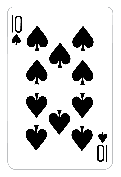

Your turn


Your hand is:


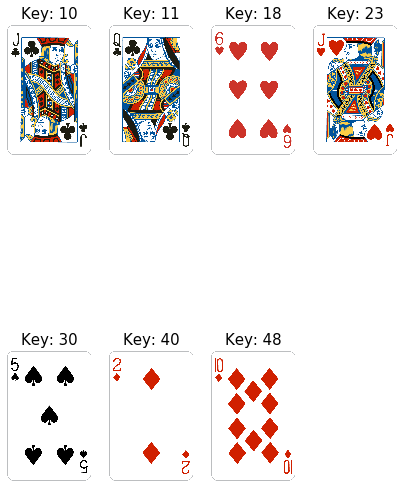


If you don't switch you will flip over the next card
Switch with a card in your hand?
'y' for yes, 'n' for no.
ophand
handop

RummyBot's hand


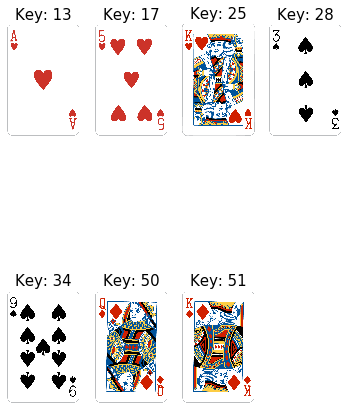

n

The card flipped over is


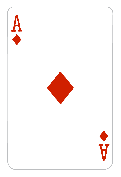

Switch with a card in your hand?
'y' for yes, 'n' for no.
n
RummyBot is taking their turn

RummyBot has decided to switch...
... and puts down...


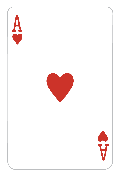

Your turn


Your hand is:


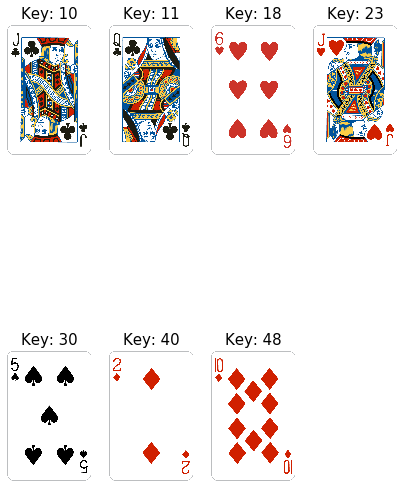


If you don't switch you will flip over the next card
Switch with a card in your hand?
'y' for yes, 'n' for no.


In [ ]:
# Try my hand at programming a more compelling card game, Rummy.


############################################################################################################
################################################ Modules ###################################################
############################################################################################################
import random
import matplotlib.pyplot as plt
import numpy as np
import time as tm
from IPython.display import Image,  HTML, display




############################################################################################################
########################################## Initial Parameters ##############################################
############################################################################################################



# Parameter list for making decisons, 15 parameters total
Par = []

# Read the settings file and set the decision parameters to the specified values
# open settings file 
file = open("RummySettings.txt", "r+") 

# For each line in the file:
for line in file:

# add that value to the parameter list
    Par.append(float(line))

# close settings file
file.close() 

# Save this for later to stop it going bokers in the learning 
Chancehold0 = Par[0]

print("Parameters for upcoming game:")
print(Par)

# define the game zones
stack = []
handop = []
hand = []
deck = [] 
deckpics = []

# Make decks using loops
suitlist = ["clubs","hearts","spades", "diamonds"]
nolist = ["Ace","2","3","4","5","6","7","8","9","10","Jack","Queen","King"]
suitlistpics = ["C","H","S", "D"]
nolistpics = ["A","2","3","4","5","6","7","8","9","10","J","Q","K"]



# For checking items in players hands
handcheck = [[0,1,2,3,4,5,6,7,8,9,10,11,12],[13,14,15,16,17,18,19,20,21,22,23,24,25],[26,27,28,29,30,31,32,33,34,35,36,37,38],[39,40,41,42,43,44,45,46,47,48,49,50,51]]
# oppcheck[0][j] are all the same suit, oppcheck[i][1] are all the same number or item
        
for i in suitlist:
    # construct written deck
    for j in nolist:
        deck.append(j+" of "+i)

deckpics = []
# construct picture deck 
for i in suitlistpics:
    # construct written deck
    for j in nolistpics:
        deckpics.append(j+i+'.png')

        
# Create 0 to 51 in a list, it's easier to do the math with numbers that represent cards rather than strings
index = []  
for k in np.arange(0,52):
    index.append(k)

# shuffle the 'deck' of indexes
index = random.sample(index,len(index)) 


# condition for which the game ends is when the game_score is nonzero
game_score = 0

# keep track of turns played so that when the game is started the rules are explained but not every time 
turncount = 0

# for referencing replies
replies = ['y','n']


# Begin the game by shuffling the indices and dealing the hands to both players 
for i in np.arange(7):
    draw,drawop = index.pop(),index.pop()
    hand.append(draw),handop.append(drawop)
    hand.sort(),handop.sort()

# Record the opponents starting hand for machine learning purposes
op_begin_hand = handop

############################################################################################################
############################################### Functions ##################################################
############################################################################################################

    
    
  
    
    
    
    
def check_suits(handchoice):
    global handcheck
    tempchecker = [[],[],[],[]]
    tempcount = [0,0,0,0]
    # sorts hand into suit, and the number of items in each suit
    for card in handchoice:
        for j in np.arange(0,3):
            if card in handcheck[j]:
                tempchecker[j].append(card)
                tempcount[j] = tempcount[j] + 1
    return(tempchecker,tempcount)    








def check_numbers(handchoice):
    global handcheck
    # returns number of each ace and two and... and kings in hand. 
    tempchecker = [[],[],[],[],[],[],[],[],[],[],[],[],[]]
    tempcount = [0,0,0,0,0,0,0,0,0,0,0,0,0]
    for card in handchoice:
        for j in np.arange(0,13):
            for k in np.arange(0,3):
                if card == handcheck[k][j]:
                    tempcount[j] = tempcount[j] + 1
                    tempchecker[j].append(card)
    return(tempchecker,tempcount)                








def swap_over(choice,handchoice):
    
    # Add top card of the stack to the hand specified
    handchoice.append(stack[len(stack)-1])
    
    # remove card from hand 
    handchoice.remove(choice) 
    
    #sort hand
    hand.sort()
    
    #Add choice to stack
    stack.append(choice)


    
    
    
    
    
    
def checkrun(handchoice,size):
    
    # returns how many runs of that size are in the set (handchoice) and where those runs start
    first_in_run = []
    success = 0
    
    for suit in np.arange(4): # check over suits
        #print("Checking suit "+ str(suitlist[suit]))
        #print(handcheck[suit][len(handcheck[suit])-1],type(handcheck[suit][len(handcheck[suit])-1]))
        for card in (handcheck[suit]): # for card in suit
            #print("checking run starting at "+str(card))
            temp_counter = 0 
            # If a hypothetical run of given size doesn't overrun the suit
            # if card + size <= last card in suit
            if card + int(size) <= handcheck[suit][len(handcheck[suit])-1]:
                #print("run within suit")
                for value in np.arange(card,(card+int(size))):
                    #print("checking "+str(value))
                    if value in handchoice:
                        temp_counter = temp_counter+1
                        #print("temp_counter increased to "+str(temp_counter))
                        if temp_counter == size:
                            success = success + 1
                            #print("success")
                            first_in_run.append(card)
                            break
                            
            # I a hypothetical run overruns the suit I need to check it doesn't wrap back around (Queen,King, Ace, 2...)
            else:
                # record how much the run overlaps by
                runon = (card + int(size)) - handcheck[suit][len(handcheck[suit])-1] 
                
                # Check if the run makes it to the end of the suit  
                for value in np.arange(card,(card+int(size))):
                    if value in handchoice:
                        temp_counter = temp_counter+1 
                        
                # Then check from the beginning of the suit for the run on 
                for value in np.arange(handcheck[suit][0],handcheck[suit][runon-1]):
                    if value in handchoice:
                        temp_counter = temp_counter + 1
    
                # Now overlap is checked just check the run size 
                if temp_counter == size:
                    success = success+1
                    first_in_run.append(card)
                    break
            
    # return how many runs of that size are in this set, and a list of where those runs begin
    return(success,first_in_run)    








def check2runs(handchoice):
    wincounter = 0
    # split hands into two examples: 3:4 and 4:3 and check both sets for runs of their respective size
    temp1, temp2, temp3, temp4 = [],[],[],[]
    for i in np.arange(len(handchoice)):
        if i < 3:
            temp1.append(handchoice[i])

        else:
            temp2.append(handchoice[i])
        
        if i < 4:
            temp3.append(handchoice[i])
            
        else:
            temp4.append(handchoice[i])
            
    A,B,C,D = checkrun(temp1,3),checkrun(temp2,4),checkrun(temp3,4),checkrun(temp4,3)        
    #print(temp1,temp2,temp3,temp4)
    a,b,c,d = A[0],B[0],C[0],D[0]
    if (a and b == 1) or (c and d == 1):
        wincounter = 1
 
    return(wincounter)   
 
    
    
    
    
    
    

    
def checktype(handchoice,number):
    # sees if there are the given number of the same type in the handchoice
    # returns the cards that are involved in that type run as well
    wincounter = 0
    cardhold = []
    
    for cardtype in np.arange(0,13):
        # Before considering every type reset count from previous type 
        temp_counter = 0
        for suit in np.arange(4):
            # e.g: Ace of spades,clubs,diamonds,hearts
            if cardtype+(suit*13) in handchoice: 
                temp_counter = temp_counter + 1
                if temp_counter == number:
                    wincounter = 1
                    for suit in np.arange(4):
                        if cardtype + (suit*13) in handchoice:
                            cardhold.append(cardtype + (suit*13))
                    

    return(wincounter,cardhold)
    



    
    
    
        
def checkwin(handchoice):
    tempcounter = 0
    wincounter = 0
    # need to check if hands have won the game
    # you win rummy if:
    
    # 1: Have a single run of seven
    check7,contents7 = checkrun(handchoice,7)
    if check7 == 1:
        wincounter = 1
        return(wincounter)
        
    # 2: you have a run of 3 in a suit and a run of 4 in a suit
    if check2runs(handchoice) == 1:
        wincounter = 1
        return(wincounter)
    
    # Concerning mixes of runs and sets
    
    four_type_check,contents_four_type = checktype(handchoice,4)

    
    # 3: you have 4 of one type and a run of three
    if four_type_check == 1:
        temphold = []
        for card in handchoice:
            if card not in contents_four_type:
                temphold.append(card)
        check_3, starts_3 = checkrun(temphold,3) 
        if check_3 == 1:
            wincounter = 1
            return(wincounter)
        
        #4: you have 4 of one type and three of another
        three_type_check_four,contents_ttc4 = checktype(temphold,3)
        if three_type_check_four == 1:
            wincounter = 1
            return(wincounter)
        
    # 5: you have 3 of a type and a run of four
    check4,starts4 = checkrun(handchoice,4)
    temphold = []
    
    # remove the run of four first, if there is one
    # start with the case that there is 1 run of exactly four 
    if check4 == 1:
        for card in handchoice:
            if card not in np.arange(starts4[0],starts4[0]+3):
                temphold.append(card)
        check3typenew,cttn = checktype(temphold,3)
        if check3typenew == 1:
            wincounter = 1
            return(wincounter)
        
    # what about a case where the run overlaps into the type? 8,9,10,J,J,J
    # Run of four plus three of a type
    if check4 > 1:
        # remove all the runs of four one at a time and check the other three cards 
        for startpoint in starts4:
            temphold = []
            for card in handchoice:
                if card not in np.arange(startpoint,startpoint+3):
                    temphold.append(card)
            check3typenewest,cttnst = checktype(temphold,3)
            if check3typenewest == 1:
                return(wincounter)    
        
    # If the hand made it through that without returning a wincounter, it's not a winning hand
    return(0)          
            

    
    
    
    
    
    
                
                

    
            

def flip_over():
    global index
 # At the end of the deck the indicies need to be 'shuffled back in'
    if (len(index) != 0): 
        # Show both players the card flipped over
        print('\n'+"The card flipped over is")
        tm.sleep(0.5)
        a = index.pop()
        stack.append(a)
        image_file  = plt.imread(deckpics[a])
        plt.figure(figsize = (2,3))
        plt.axis('off')
        plt.imshow(image_file)
        plt.show()                         

        
    else: 
        # ran out of indicies to pick from 
        # shuffle the stack back into the deck of indicies and then clear the stack
        for i in stack:
            index.append(i)
        
        stack.clear()
        # shuffle the 'deck' of indexes
        index = random.sample(index,len(index))
        print("The stack was shuffled back into the deck"+'\n'+"The card flipped over is")
        a = index.pop()
        stack.append(a)
        image_file  = plt.imread(deckpics[a])
        plt.figure(figsize = (2,3))
        plt.axis('off')
        plt.imshow(image_file)
        plt.show() 



        
        
        
        
        
def make_decision():  
    global Par
    decision_card = 1000 # start with an invalid card selection 
    switch_chance = Par[0] # initally set chance for opponent to switch by parameter 0
    chancehand = [1.0,1.0,1.0,1.0,1.0,1.0,1.0]
    # chance to switch with any particular card in the hand 
    # at the beginning they are all equally likely 
        
    temp_zone = []
    temp_zone.append(stack[len(stack)-1])
    # hold the top card of the stack for consideration
    stacksuit_check,stacksuit_count = check_suits(temp_zone)
    stacknumber_check,stacknumber_count = check_numbers(temp_zone)
        
        
    # If the top card of the stack is in the same suit as at least 3 cards in the opponents hand
    # increase the chance of them wanting to switch. (A card that isn't of those three) 
    # first check if the opponents hand has 3 or more in the same suit
    suitcontent,suitcount = check_suits(handop)
    for i in np.arange(0,3):
        if suitcount[i] >= 3: # positive case where 3 cards share the same suit:
            switch_chance = switch_chance * Par[1] # increase odds that the computer will switch, by parameter 1
            # identify the cards that share the suit so that those probablilities can be lowered
            for card in suitcontent[i]:
                if card in handop:
                    # lower chance of that card being switched by parameter 2
                    chancehand[handop.index(card)] = chancehand[handop.index(card)] * Par[2]
    
    # If RummyBot has a 'bad hand', I want to vastly increase the likelyhood that it will switch 
    badruncheck = checkrun(handop,2)
    badtypecheck = checktype(handop,2)


    # If RummyBot doesn't even have a run of two or doesn't even have two of the same type
    bad_hand = 0
    if (badruncheck[0] + badtypecheck[0]) <= 1:
        # Increase chance of switching by Par[18]
        Par[0] = Par[0]* Par[18]
        bad_hand = 1
    
    # Rummybot should still be playing actively even if it has a medium hand
    medruncheck = checkrun(handop,3)
    medtypecheck = checktype(handop,3)
    
    # If RummyBot doesn't have a run of three and doesn't have three of a type
    if medtypecheck[0] == 0 and medtypecheck[0] == 0 and bad_hand == 0:
        Par[0] = Par[0]* Par[19] 
    
    # reset bad hand judgement
    bad_hand = 0


    
    # If there are runs in the same suit, you want to keep them
    # exceptions must be, in between suits
    crosschecks = [11.5,12,12.5,24.5,25,25.5,37.5,38,38.5] 
    # If the midpoint of two cards is one of these numbers, the two cards overlap the boundary between two suits

    for card in handop: 
        for card2 in handop:
            if card != card2: 
            # Don't want to compare cards to themselves
                if card < card2:
                #dont' want to double count pairs
                    if ((card + card2) / 2) not in crosschecks and (card2 - card) < 5 :
                        loc_in_hand,loc_in_hand2  =  handop.index(card),handop.index(card2)
                    # Don't want to cross suits when looking for runs
                        if ((card2 - card) == 3):
                            # If the card on the stack is in the middle of a run the opponent already has... 
                            # ...increase the switch chance dramatically
                            if temp_zone[0] > card and temp_zone[0] < card2:
                                switch_chance = switch_chance * Par[3]
                                chancehand[loc_in_hand] = chancehand[loc_in_hand] * Par[4]
                                chancehand[loc_in_hand2] = chancehand[loc_in_hand2] * Par[4]
                            else:
                                chancehand[loc_in_hand] = chancehand[loc_in_hand] * Par[5]
                                chancehand[loc_in_hand2] = chancehand[loc_in_hand2] * Par[5]
                        if ((card2 - card) == 2):
                            # If the card is between these two take it nearly for sure
                            if temp_zone[0] > card and temp_zone[0]< card2:
                                switch_chance = Par[6]
                                chancehand[loc_in_hand] = chancehand[loc_in_hand] * Par[7]
                                chancehand[loc_in_hand2] = chancehand[loc_in_hand2] * Par[7]
                            else:    
                                chancehand[loc_in_hand] = chancehand[loc_in_hand] * Par[8]
                                chancehand[loc_in_hand2] = chancehand[loc_in_hand2] * Par[8]
                                   
                        if ((card2 - card) == 1):
                            # If the card completes a two card run you already have 
                            if temp_zone[0] == card-1 or temp_zone[0] == card2+1:
                                switch_chance = Par[9]
                                chancehand[loc_in_hand] = chancehand[loc_in_hand] * Par[10]
                                chancehand[loc_in_hand2] = chancehand[loc_in_hand2] * Par[10]
                            else:
                                chancehand[loc_in_hand] = chancehand[loc_in_hand] * Par[11]
                                chancehand[loc_in_hand2] = chancehand[loc_in_hand2] * Par[11]
        
        
            
    # That's all the runs considerations done, now for numbers       
    numbercontent,numbercount = check_numbers(handop)
    for i in np.arange(0,13):
        if len(numbercontent[i]) != 1 and len(numbercontent[i]) != 0:
        # for 2 tempmodifier is 0.8, for 3 it is 0.6 and for four it's 0.4
            tempmodifier = 1-(Par[12] * (len(numbercontent[i]) - 1))  
            # now we have the numbers that the cards are
            # we need to locate them in the hand
            for card in numbercontent[i]:
                loc_in_hand = handop.index(card)
                # now we have found them, we need to decrease their chance of being swapped in kind
                chancehand[loc_in_hand] = chancehand[loc_in_hand] * tempmodifier
                    
                # if the card on the stack is of the same number... 
                # ...we want to increase the chance of switching.
                # if not, we want to decrease the chance of switching.
                if stacknumber_count[i] == 1:
                    switch_chance = switch_chance * (1.0/(tempmodifier+Par[13]))
                else:
                    switch_chance = switch_chance * Par[14]
                    
    # Now it's time to make the switch
    tm.sleep(1)
    switch_chance_roll = random.uniform(0,1)
    
     
    
    # decide on the card whether or not the computer wants to switch
    # now produce a random float in the range 0 to total_handprob 
    # where total_handprob is the sum of the weights of the cards 
    total_handprob = sum(chancehand)
    card_chance = random.uniform(0,1)*total_handprob
            
    # now take the items of the probability list off in order until the result is less than zero
    # this will be the card the computer switches
    
    
    for i in np.arange(0,7):
        card_chance = card_chance - chancehand[i]
        if card_chance < 0:
            decision_card = handop[i]
            break
            
    if decision_card == 1000:
        print("ERROR IMMINENT- NO CARD SELECTED")
    
    if switch_chance_roll < switch_chance:
        # The computer has decided to switch 
        decision_roll = 1
    else:
        decision_roll = 0
    
    # output the results of the computers decision
    return(decision_roll,decision_card)









    
    
    
    
    
      
def handshow(hand,sizes):
    imshowlist = []
    for card in hand:
        imshowlist.append(plt.imread(deckpics[card]))
    imshowlist.append(plt.imread('white.png'))
    
    f, axarr = plt.subplots(2,4,figsize = (sizes[0],sizes[1]))

    axarr[0,0].imshow(imshowlist[0])
    axarr[0,0].set_title('Key: '+str(hand[0]),fontsize = 15)
    axarr[0,0].axis('off')

    axarr[0,1].imshow(imshowlist[1])
    axarr[0,1].set_title('Key: '+str(hand[1]),fontsize = 15)
    axarr[0,1].axis('off')

    axarr[0,2].imshow(imshowlist[2])
    axarr[0,2].set_title('Key: '+str(hand[2]),fontsize = 15)
    axarr[0,2].axis('off')

    axarr[0,3].imshow(imshowlist[3])
    axarr[0,3].set_title('Key: '+str(hand[3]),fontsize = 15)
    axarr[0,3].axis('off')
    
    axarr[1,0].imshow(imshowlist[4])
    axarr[1,0].set_title('Key: '+str(hand[4]),fontsize = 15)
    axarr[1,0].axis('off')

    axarr[1,1].imshow(imshowlist[5])
    axarr[1,1].set_title('Key: '+str(hand[5]),fontsize = 15)
    axarr[1,1].axis('off')

    axarr[1,2].imshow(imshowlist[6])
    axarr[1,2].set_title('Key: '+str(hand[6]),fontsize = 15)
    axarr[1,2].axis('off')

    axarr[1,3].imshow(imshowlist[7])

    axarr[1,3].axis('off')

    plt.show()


        
def printhand():
    print('\n'+"Your hand is:")    
    handshow(hand,[7,11])

    
    
    
    
    
    
    
def printhandop():
    print('\n'+"RummyBot's hand")
    handshow(handop,[6,9])

        
        
        
        
        
        
        
def ask_to_switch():
    d = 100 
    #100 is the default 'no' because 100 isn't a valid entry elsewhere 
    h = 0
    #h is just so the prompt doesnt spam the user
    print("Switch with a card in your hand?")
    if turncount == 0 and h == 0:
        print("'y' for yes, 'n' for no.")
        h = 1
    
    # User replies, program checks if reply is valid      
    validreply = 0    
    while validreply == 0:
        reply = input()
        
        
        ##### checks for while the game is running #####
        
        if reply == 'handop':
            printhandop()
        
        if reply == 'myhand':
            printhand()
        
        if reply == 'stack':
            indextop = stack[len(stack)-1]
            image_file = plt.imread(deckpics[indextop])
            plt.figure(figsize = (2,3))
            plt.axis('off')
            plt.imshow(image_file)
            plt.show()      
        
        # Checking types of conditions for both hands  
        if reply == 'check':
            print('Which hand do you want to check?')
            checkdone = 0
            while checkdone == 0:
                replycheck = input()
                if replycheck == 'cancel':
                    checkdone = 1
                    
                if replycheck == 'mine':
                    print('Run of 2: '+str(checkrun(hand,2)))
                    print('Run of 3: '+str(checkrun(hand,3)))
                    print('Run of 4: '+str(checkrun(hand,4)))
                    print('Run of 5: '+str(checkrun(hand,5)))
                    print('Run of 6: '+str(checkrun(hand,6)))
                    print('Run of 7: '+str(checkrun(hand,7)))
                    print('Two runs: '+str(check2runs(hand)))
                    print('2 of type: '+str(checktype(hand,2)))
                    print('3 of type: '+str(checktype(hand,3)))
                    print('4 of type: '+str(checktype(hand,4)))
                    print('Win: '+ str(checkwin(hand)))
                    checkdone = 1
                
                if replycheck == 'op':
                    print('Run of 2: '+str(checkrun(handop,2)))
                    print('Run of 3: '+str(checkrun(handop,3)))
                    print('Run of 4: '+str(checkrun(handop,4)))
                    print('Run of 5: '+str(checkrun(handop,5)))
                    print('Run of 6: '+str(checkrun(handop,6)))
                    print('Run of 7: '+str(checkrun(handop,7)))
                    print('Two runs: '+str(check2runs(handop)))
                    print('2 of type: '+str(checktype(handop,2)))
                    print('3 of type: '+str(checktype(handop,3)))
                    print('4 of type: '+str(checktype(handop,4)))
                    print('Win: '+ str(checkwin(handop)))         
                    checkdone = 1  
                
                else:
                    print('Invalid entry')
                
                    
        
       ################################################## 
    
        if reply in replies:
            validreply = 1
            if reply == 'y':
                print("Choose the number of the card in your hand to switch")
                # Need to verify that users choice is in their hand
                validreply2 = 0
                while validreply2 == 0:
                    reply2 = int(input())
                    if reply2 in hand:
                        validreply2 = 1
                        d = reply2
                    else:
                        print("That choice isn't in your hand")
            else:
                break              
    return(d)           








def playerhaswon(indicator):
    if indicator == 1:
        print("You have won!")
        printhand()
        print("RummyBot lost with the hand:")
        printhandop()
    
    elif indicator == -1:
        print("RummyBot has won with the hand: ")
        printhandop()
    
            

        
        
        
        
        
def taketurn(player):  
    # If it returns 1, the player won on that turn, -1 means the computer won, 0 means no one has yet
    woncounter = 0
    # Player = 0 means the player is taking their turn
    if (player == 0): 
        print("Your turn"+'\n')
        printhand()
        print('\n'+"If you don't switch you will flip over the next card")
        first_decision = ask_to_switch()
        
        # If the user declines to switch 
        if first_decision != 100:
            print("You put down the "+str(deck[first_decision]))
            swap_over(first_decision,hand)
            woncounter = checkwin(hand)
            #print("winning hand check has returned "+str(woncounter))
            if woncounter == 1:
                return(1)
            tm.sleep(0.2)   
            
        else:    
            flip_over()
            second_decision = ask_to_switch()
            if second_decision != 100:
                print("You put down the "+str(deck[second_decision]))
                swap_over(second_decision,hand)
                woncounter = checkwin(hand)
                #print("winning hand check has returned "+str(woncounter))
                if woncounter == 1:
                    return(1)
                tm.sleep(0.2)
                
        
        
        
    # If the player counter isn't zero it is the opponents turn
    # I want the opponent to have AI, but some randomness built in so it isn't unbeatable
    # If the settings are updated enough times, the computer should minimise 'mistakes' by reducing the chance...
    # ... that good cards are swapped to near zero.
    
    else:
        print("RummyBot is taking their turn"+'\n')
        #printhandop()
        decision_op,card_decided = make_decision()
        tm.sleep(0.2)
        if decision_op == 1:
            print("RummyBot has decided to switch...")
            tm.sleep(0.2)
            print("... and puts down...")
            tm.sleep(0.2)
            image_file  = plt.imread(deckpics[card_decided])
            plt.figure(figsize = (2,3))
            plt.axis('off')
            plt.imshow(image_file)
            plt.show()
            swap_over(card_decided,handop)
            woncounter = checkwin(handop)
            #print("winning hand check has returned "+str(woncounter))
            if woncounter == 1:
                return(-1)
            

            
        else:
            print("RummyBot decides to flip to the next card")
            flip_over()
            decision2,card_decided2 = make_decision()
            tm.sleep(0.2)
            if decision2 == 1:
                print("RummyBot has decided to switch...")
                tm.sleep(0.2)
                print("... and puts down...")
                tm.sleep(0.2)
                image_file  = plt.imread(deckpics[card_decided2])
                plt.figure(figsize = (2,3))
                plt.axis('off')
                plt.imshow(image_file)
                plt.show()
                swap_over(card_decided2,handop)
                woncounter = checkwin(handop)
                #print("winning hand check has returned "+str(woncounter))
                if woncounter == 1:
                    return(-1)
            else:
                print("RummyBot passes the turn")

            
    return(0)        
        


############################################################################################################
########################################### Playing the Game ###############################################
############################################################################################################    
    
       
    
# Start the game by flipping the first card
flip_over()

# Just counters to track if someone has won
a,b = 0,0 

#  ... while nobody has won:
while (a == 0) and (b == 0): 
   
    # player takes their turn, if they won win sequence initiates
    a = taketurn(0)
    playerhaswon(a)

    
    if a == 0:
        # ditto for op
        b = taketurn(1)
        playerhaswon(b)

    


############################################################################################################
############################################### Learning ###################################################
############################################################################################################

# Feedback loop that updates rummybots settings so that it can learn over many games

# Reset Par[0]
Par[0] = Chancehold0

# Keep track of total games
Par[17] = Par[17] + 1
print("""

RummyBot has played """+str(Par[17])+" games.")

# If RummyBot Won:
if a == 0:
    # Reset loss streak 
    Par[15] = 0

# If RummyBot lost:
if a != 0:
    
    # Record loss in streak 
    Par[15] = Par[15] + 1 
    
    # One loss leads to 1% changes
    # 2 losses in a row 2% changes
    # 3 losses in a row 3% changes and so on
    percent_multiplier = Par[15] * 0.01  
    
    increase = 1.00 + percent_multiplier # 1.04 after four losses for instance 
    decrease = 1.00 - percent_multiplier # 0.90 after ten losses for instance 

    
    # Find how many cards Rummybot never switched
    cards_from_opener = 0
    for i in handop:
        if i in op_begin_hand:
            cards_from_opener = cards_from_opener + 1 
    
    # Depending on how RummyBot lost, it will update its parameters
    
    # If RummyBot had 5 or more cards from its starting hand, it needs to switch more 
    if cards_from_opener >= 5:
        Par[0] = Par[0] * increase
        Par[18] = Par[18] * increase
        Par[19] = Par[19] * increase        
    
    # If Rummybot has 3 cards or less from its starting hand, switch less
    if cards_from_opener <= 3:
        Par[0] = Par[0] * decrease
        Par[18] = Par[18] * decrease
        Par[19] = Par[19] * decrease
    
    # If Rummybot had no runs of 3 or 4 , prioritise runs  and suits more 
    check3,starts3 = checkrun(handop,3)
    check4,starts4 = checkrun(handop,4)

    if (check3 == 0) and (check4 == 0):       
        Par[1] = Par[1]   * increase
        Par[2] = Par[2]   * decrease
        Par[3] = Par[3]   * increase
        Par[4] = Par[4]   * decrease
        Par[5] = Par[5]   * increase
        Par[6] = Par[6]   * increase
        Par[7] = Par[7]   * decrease
        Par[8] = Par[8]   * increase
        Par[9] = Par[9]   * increase
        Par[10] = Par[10] * decrease
        Par[11] = Par[11] * increase
        
    # If Rummybot has a run of 5 or 6 , prioritise runs and suits less 
    check5,starts5 = checkrun(handop,3)
    check6,starts6 = checkrun(handop,4)

    if (check5 == 1) or (check6 == 1):   
        Par[1] = Par[1]   * decrease**2
        Par[2] = Par[2]   * increase**2
        Par[3] = Par[3]   * decrease**2
        Par[4] = Par[4]   * increase**2
        Par[5] = Par[5]   * decrease**2
        Par[6] = Par[6]   * decrease**2
        Par[7] = Par[7]   * increase**2
        Par[8] = Par[8]   * decrease**2
        Par[9] = Par[9]   * decrease**2
        Par[10] = Par[10] * increase**2
        Par[11] = Par[11] * decrease**2

    # If Rummybot had no more than 3 of the same type, prioritise types more   
    three_type_check,contents_three_type = checktype(handop,3)
    four_type_check,contents_four_type = checktype(handop,4)

    if (three_type_check == 0) and (four_type_check == 0):   
        Par[12] = Par[12] * increase
        Par[13] = Par[13] * increase

    # open settings file 
    file = open("RummySettings.txt", "r+") 
 
    
    # Write the new parameters to the file  
    file.write(str(Par[0])+'\n')
    file.write(str(Par[1])+'\n')
    file.write(str(Par[2])+'\n')
    file.write(str(Par[3])+'\n')
    file.write(str(Par[4])+'\n')
    file.write(str(Par[5])+'\n')
    file.write(str(Par[6])+'\n')
    file.write(str(Par[7])+'\n')
    file.write(str(Par[8])+'\n')
    file.write(str(Par[9])+'\n')
    file.write(str(Par[10])+'\n')
    file.write(str(Par[11])+'\n')
    file.write(str(Par[12])+'\n')
    file.write(str(Par[13])+'\n')
    file.write(str(Par[14])+'\n')
    file.write(str(Par[14])+'\n')
    file.write(str(Par[15])+'\n')
    file.write(str(Par[16])+'\n')
    file.write(str(Par[17])+'\n')
    file.write(str(Par[18])+'\n')
    file.write(str(Par[19])+'\n')


    # close settings file
    file.close() 
    





